<a href="https://colab.research.google.com/github/MayaJawnPhilly/Misc.-Projects/blob/main/border_crossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

Saving Border_Crossing_Entry_Data.csv to Border_Crossing_Entry_Data (2).csv
User uploaded file "Border_Crossing_Entry_Data (2).csv" with length 45928168 bytes


In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396401 entries, 0 to 396400
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  396401 non-null  object 
 1   State      396401 non-null  object 
 2   Port Code  396401 non-null  int64  
 3   Border     396401 non-null  object 
 4   Date       396401 non-null  object 
 5   Measure    396401 non-null  object 
 6   Value      396401 non-null  int64  
 7   Latitude   396401 non-null  float64
 8   Longitude  396401 non-null  float64
 9   Point      396401 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.2+ MB


In [40]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year

df.head()

<ipython-input-40-872f2edbbf35>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-40-872f2edbbf35>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Port Name    State  Port Code            Border      Date  \
0          Roma    Texas       2310  US-Mexico Border  Dec 2023   
1       Del Rio    Texas       2302  US-Mexico Border  Dec 2023   
2  Willow Creek  Montana       3325  US-Canada Border  Jan 2024   
3      Whitlash  Montana       3321  US-Canada Border  Jan 2024   
4        Ysleta    Texas       2401  US-Mexico Border  Jan 2024   

                       Measure   Value  Latitude  Longitude  \
0                        Buses      46    26.404    -99.019   
1                       Trucks    6552    29.327   -100.928   
2                  Pedestrians       2    49.000   -109.731   
3            Personal Vehicles      29    48.997   -111.258   
4  Personal Vehicle Passengers  521714    31.673   -106.335   

                                        Point  Month  Year  
0                POINT (-99.018981 26.403928)     12  2023  
1               POINT (-100.927612 29.326784)     12  2023  
2               POINT (-109.731333 48.999972)      1  2024  
3                POINT (-111.257916 48.99725)      1  2024  
4  POINT (-106.335449846028 31.6731261376859)      1  2024

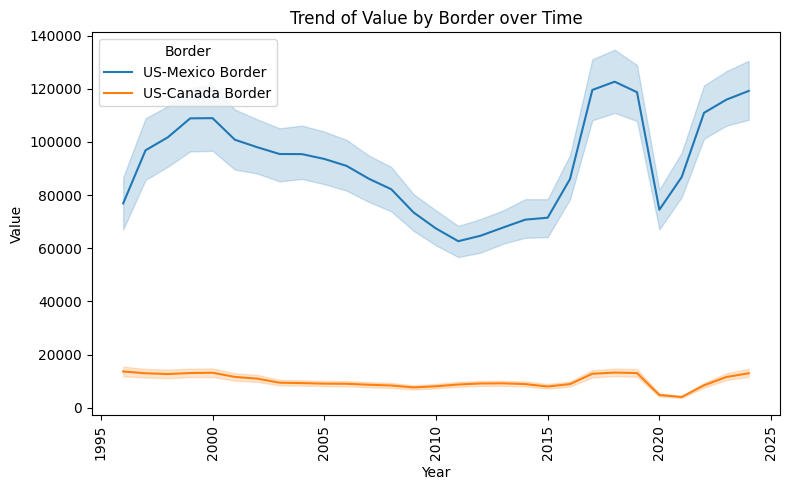

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by Border, Year, and Month, then sum the values
grouped_data = df.groupby(['Border', 'Year'])['Value'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(8, 5))
sns.lineplot(x="Year", y="Value", hue="Border", data=df)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Trend of Value by Border over Time")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", color="Value", size="Value",
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=3,
                        mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

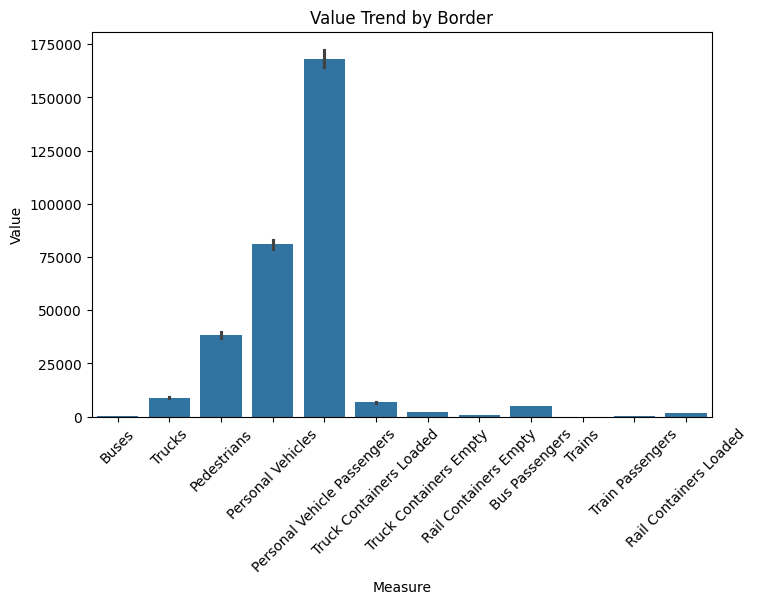

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Measure', y='Value', data=df)
plt.title('Value Trend by Border')
plt.xlabel('Measure')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()